# Explore here

In [72]:
# Your code here
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.datasets import fetch_california_housing
from pickle import dump


df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1.EDA

In [50]:
df.shape

(768, 9)

In [51]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [52]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [53]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.drop(columns=[])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.isnull().any(axis=0)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


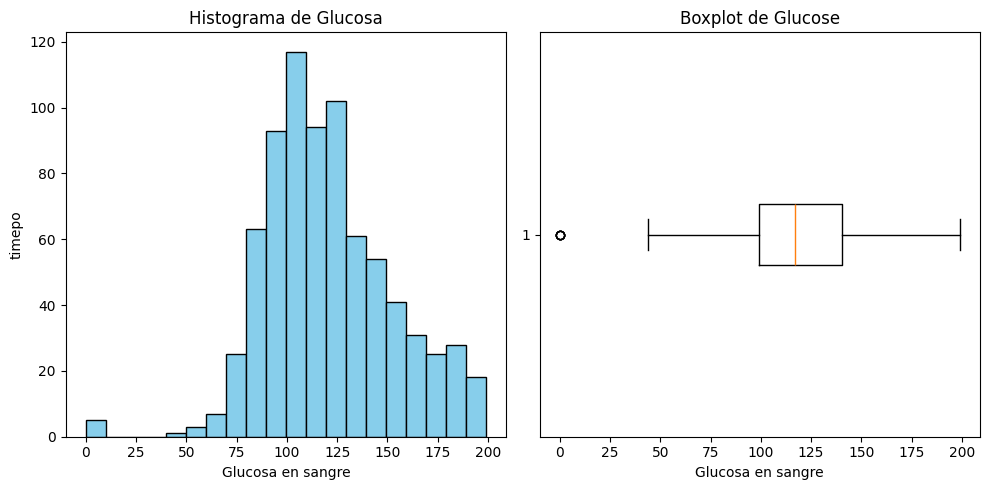

In [58]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Glucosa')
ax[0].set_xlabel('Glucosa en sangre')
ax[0].set_ylabel('timepo')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['Glucose'], vert=False)
ax[1].set_title('Boxplot de Glucose')
ax[1].set_xlabel('Glucosa en sangre')

plt.tight_layout()
plt.show()

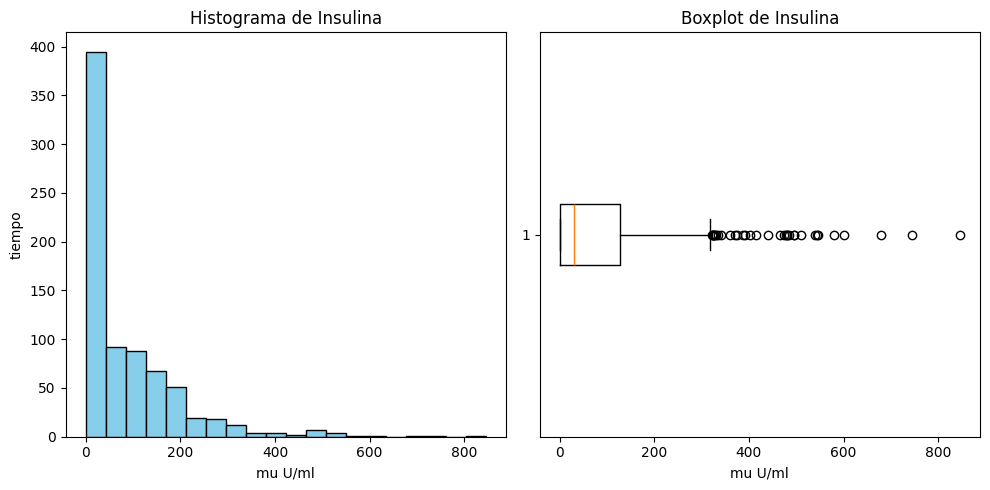

In [59]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['Insulin'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Insulina')
ax[0].set_xlabel('mu U/ml')
ax[0].set_ylabel('tiempo')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['Insulin'], vert=False)
ax[1].set_title('Boxplot de Insulina')
ax[1].set_xlabel('mu U/ml')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [60]:
# Incidencia de los valores perdidos en cada una de las variables.
df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

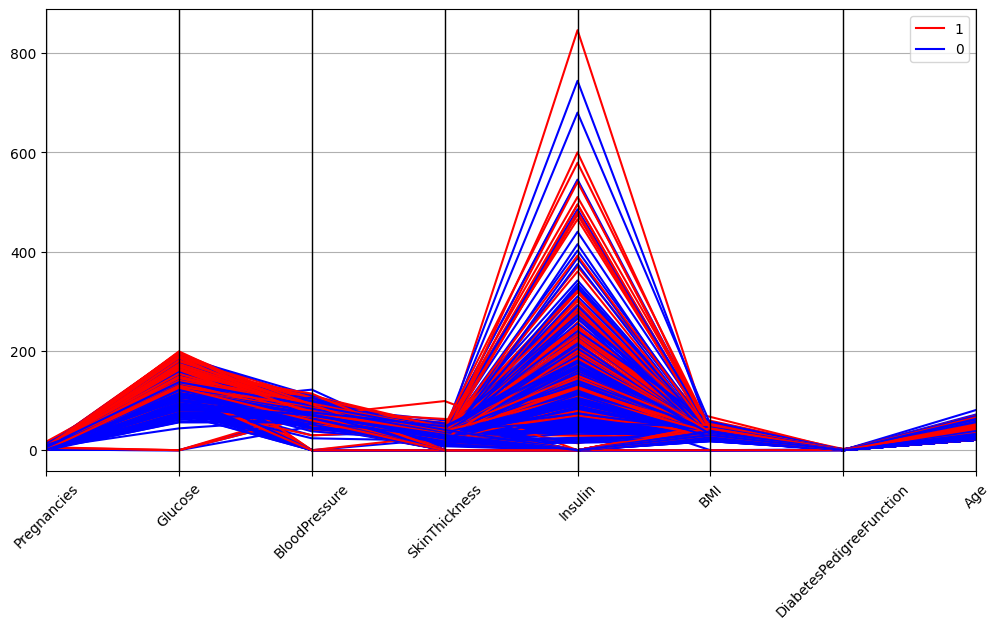

In [61]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

se puede observar una mayor tendecia en los valores de glucosa en personas diabeticas al igual en los embarazos con respecto a la normalidad.

In [62]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Descartamos una de las columnas 
selected_model = SelectKBest(k = 7)
selected_model.fit(X_train, y_train)

selected_columns = X_train.columns[selected_model.get_support()]
X_train_sel = pd.DataFrame(selected_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selected_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [63]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [64]:
# Guardamos en csv para un acceso rápido
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

2.MODELO DE ARBOL DE DECISION 

In [65]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


[Text(0.5, 0.875, 'Age <= 28.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = N'),
 Text(0.25, 0.625, 'Glucose <= 127.5\ngini = 0.304\nsamples = 300\nvalue = [244, 56]\nclass = N'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]\nclass = N'),
 Text(0.375, 0.375, 'SkinThickness <= 31.5\ngini = 0.5\nsamples = 79\nvalue = [40, 39]\nclass = N'),
 Text(0.3125, 0.125, 'gini = 0.471\nsamples = 50\nvalue = [31, 19]\nclass = N'),
 Text(0.4375, 0.125, 'gini = 0.428\nsamples = 29\nvalue = [9, 20]\nclass = P'),
 Text(0.75, 0.625, 'BMI <= 27.85\ngini = 0.5\nsamples = 314\nvalue = [157, 157]\nclass = N'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 123.0\ngini = 0.358\nsamples = 77\nvalue = [59, 18]\nclass = N'),
 Text(0.5625, 0.125, 'gini = 0.17

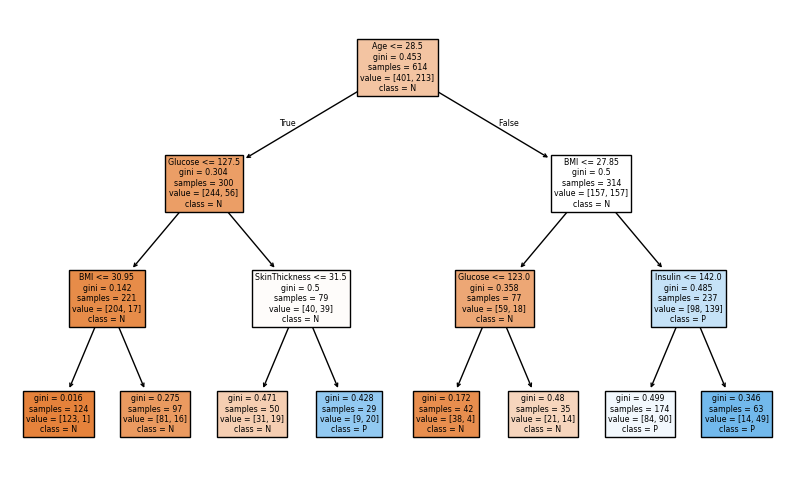

In [66]:
model= DecisionTreeClassifier 

complex_tree = model(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = model(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)


plt.figure(figsize=(10,6))
plot_tree(simple_tree, feature_names=list(X_train.columns), class_names=['N', 'P'], filled=True)

[Text(0.4602238581730769, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = N'),
 Text(0.1650390625, 0.8928571428571429, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = N'),
 Text(0.31263146033653844, 0.9285714285714286, 'True  '),
 Text(0.06009615384615385, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = N'),
 Text(0.019230769230769232, 0.75, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = N'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = N'),
 Text(0.028846153846153848, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = N'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = P'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\ncla

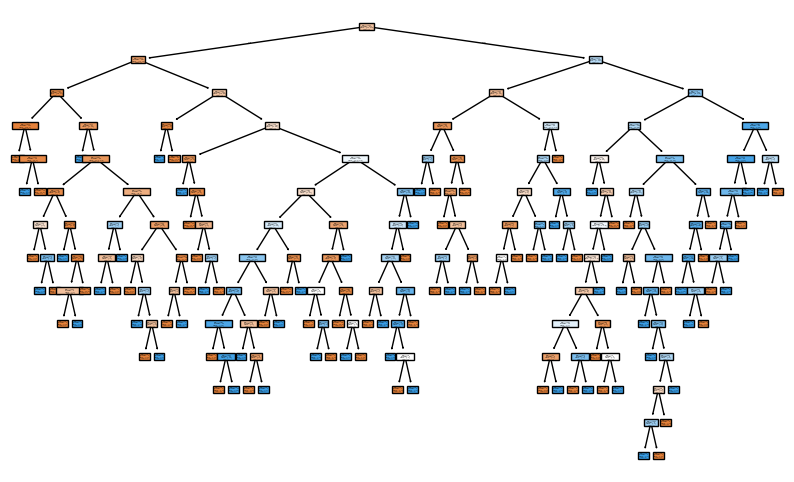

In [67]:
plt.figure(figsize=(10,6))
plot_tree(complex_tree, feature_names=list(X_train.columns), class_names=['N', 'P'], filled=True)

In [68]:
# Metricas para comparar los arboles y ver cual es mejor 

metricas = {"Exactitud": accuracy_score,"Precisión": precision_score, "Sensibilidad": recall_score, "F1": f1_score,"AUC": roc_auc_score}

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):

    results = {"Train": [], "Test": [], "Diferencia": []}
    
    
    for metric_name, metric_func in metricas.items():
        train_value = metric_func(y_train, y_pred_train)
        test_value = metric_func(y_test, y_pred_test)
        results["Train"].append(train_value)
        results["Test"].append(test_value)
        results["Diferencia"].append(train_value - test_value)

    metricas_df = pd.DataFrame(results, index=metricas.keys())
    
    return metricas_df


metricas_df_simple = get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)
metricas_df_complex = get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

print("Las métricas del modelo simple son:")
print(metricas_df_simple)
print("Las métricas del modelo complejo son:")
print(metricas_df_complex)

Las métricas del modelo simple son:
                 Train      Test  Diferencia
Exactitud     0.737785  0.636364    0.101421
Precisión     0.597744  0.493976    0.103768
Sensibilidad  0.746479  0.745455    0.001024
F1            0.663883  0.594203    0.069680
AUC           0.739823  0.660606    0.079217
Las métricas del modelo complejo son:
              Train      Test  Diferencia
Exactitud       1.0  0.746753    0.253247
Precisión       1.0  0.625000    0.375000
Sensibilidad    1.0  0.727273    0.272727
F1              1.0  0.672269    0.327731
AUC             1.0  0.742424    0.257576


las metricas del modelo simple se ajustan mas ya que hay menos diferencia entre ambas. Seguramente podriamos ajustarlo más.

In [69]:
print(f'El accuracy_score es: {accuracy_score(y_test, y_pred_test_simple)}')

El accuracy_score es: 0.6363636363636364


EL modelo podria optimizarse

In [70]:
hyperparams = {"criterion": ["gini", "entropy"],"max_depth": [3, 5, 10, None],"min_samples_split": [2, 5, 10],"min_samples_leaf": [1, 2, 4]}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=hyperparams, cv=10)
grid_search.fit(X_train, y_train)

opti_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
opti_tree.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [71]:
# Comprobamos los parametros optimizados 

opti_tree= DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
opti_tree.fit(X_train, y_train)

y_pred_train_opti = opti_tree.predict(X_train)
y_pred_test_opti = opti_tree.predict(X_test)

y_pred_opti = opti_tree.predict(X_test)
metricas_df_opti = get_metrics(y_train, y_test, y_pred_train_opti, y_pred_test_opti)

print(metricas_df_opti)

                 Train      Test  Diferencia
Exactitud     0.812704  0.779221    0.033483
Precisión     0.737864  0.684211    0.053654
Sensibilidad  0.713615  0.709091    0.004524
F1            0.725537  0.696429    0.029108
AUC           0.789476  0.763636    0.025839


In [73]:
dump(opti_tree, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))